Steps:
1. Time plot: year, month, day, hours


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [67]:
crime_lapd = pd.read_csv("crime_20_24_clean.csv")
print(crime_lapd.head())

       dr_no   date_rptd             date_occ    area_name  rpt_dist_no  \
0  211507896  2021-04-11  2020-11-07 08:45:00  N Hollywood         1502   
1  201516622  2020-10-21  2020-10-18 18:45:00  N Hollywood         1521   
2  240913563  2024-12-10  2020-10-30 12:40:00     Van Nuys          933   
3  210704711  2020-12-24  2020-12-24 13:10:00     Wilshire          782   
4  201418201  2020-10-03  2020-09-29 18:30:00      Pacific         1454   

   part_1-2  crm_cd                                        crm_cd_desc  \
0         2     354                                  THEFT OF IDENTITY   
1         1     230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
2         2     354                                  THEFT OF IDENTITY   
3         1     331  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...   
4         1     420    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)   

   vict_age vict_sex vict_descent             premis_desc status  status_desc  \
0      31.0        M   

In [49]:
crime_lapd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913647 entries, 0 to 913646
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dr_no         913647 non-null  int64  
 1   date_rptd     913647 non-null  object 
 2   date_occ      913647 non-null  object 
 3   area_name     913647 non-null  object 
 4   rpt_dist_no   913647 non-null  int64  
 5   part_1-2      913647 non-null  int64  
 6   crm_cd        913647 non-null  int64  
 7   crm_cd_desc   913647 non-null  object 
 8   vict_age      683742 non-null  float64
 9   vict_sex      913647 non-null  object 
 10  vict_descent  913647 non-null  object 
 11  premis_desc   913647 non-null  object 
 12  status        913647 non-null  object 
 13  status_desc   913647 non-null  object 
 14  location      913647 non-null  object 
 15  lat           913647 non-null  float64
 16  lon           913647 non-null  float64
dtypes: float64(3), int64(4), object(10)
memory usage

In [50]:
crime_lapd["date_rptd"] = pd.to_datetime(crime_lapd["date_rptd"])
crime_lapd["date_occ"] = pd.to_datetime(crime_lapd["date_occ"])
crime_lapd["area_name"] = crime_lapd["area_name"].astype("category")
crime_lapd["rpt_dist_no"] = crime_lapd["rpt_dist_no"].astype("category")
crime_lapd["part_1-2"] = crime_lapd["part_1-2"].astype("category")
crime_lapd["crm_cd"] = crime_lapd["crm_cd"].astype("category")
crime_lapd["crm_cd_desc"] = crime_lapd["crm_cd_desc"].astype("category")
crime_lapd["vict_sex"] = crime_lapd["vict_sex"].astype("category")
crime_lapd["vict_descent"] = crime_lapd["vict_descent"].astype("category")
crime_lapd["premis_desc"] = crime_lapd["premis_desc"].astype("category")
crime_lapd["status"] = crime_lapd["status"].astype("category")
crime_lapd["status_desc"] = crime_lapd["status_desc"].astype("category")
crime_lapd["location"] = crime_lapd["location"].astype("category")

In [51]:
crime_lapd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913647 entries, 0 to 913646
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   dr_no         913647 non-null  int64         
 1   date_rptd     913647 non-null  datetime64[ns]
 2   date_occ      913647 non-null  datetime64[ns]
 3   area_name     913647 non-null  category      
 4   rpt_dist_no   913647 non-null  category      
 5   part_1-2      913647 non-null  category      
 6   crm_cd        913647 non-null  category      
 7   crm_cd_desc   913647 non-null  category      
 8   vict_age      683742 non-null  float64       
 9   vict_sex      913647 non-null  category      
 10  vict_descent  913647 non-null  category      
 11  premis_desc   913647 non-null  category      
 12  status        913647 non-null  category      
 13  status_desc   913647 non-null  category      
 14  location      913647 non-null  category      
 15  lat           913

<Axes: xlabel='vict_sex', ylabel='count'>

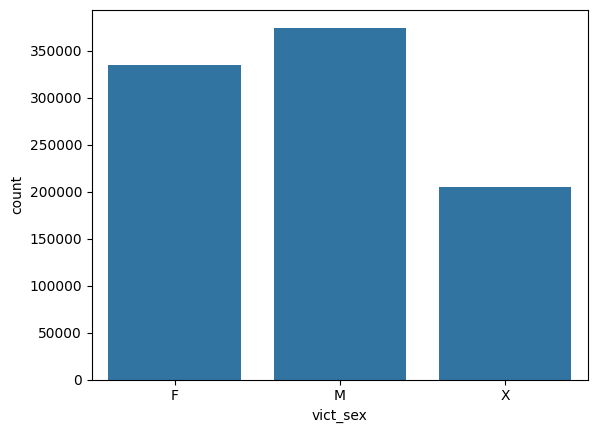

In [53]:
sns.countplot(x="vict_sex", data=crime_lapd)

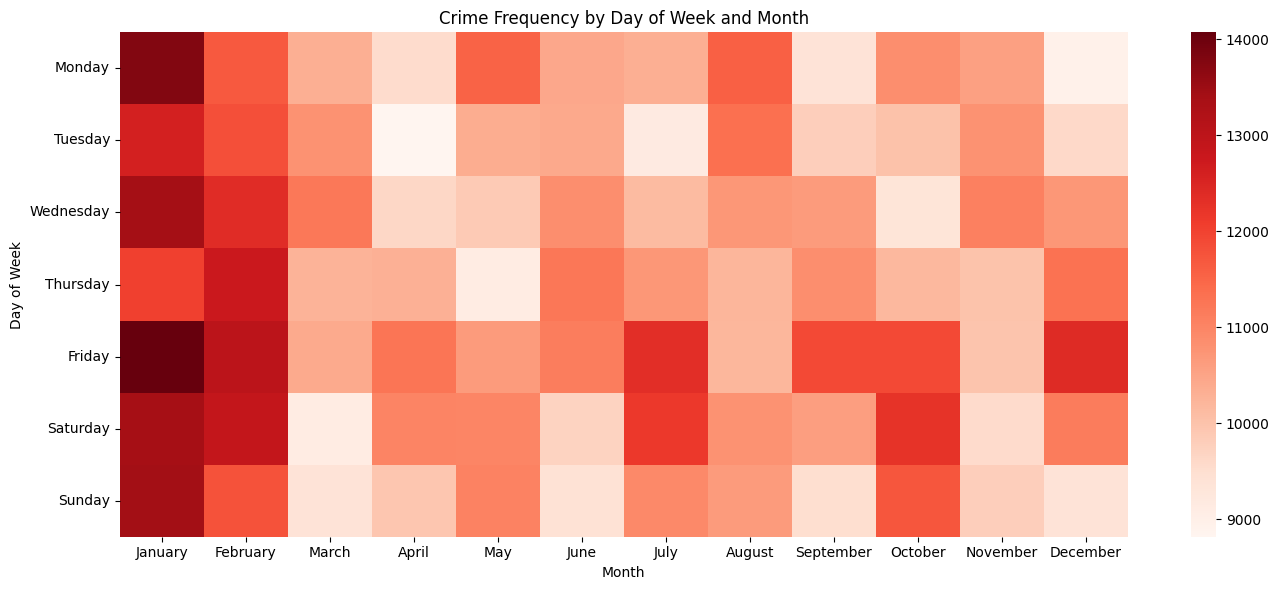

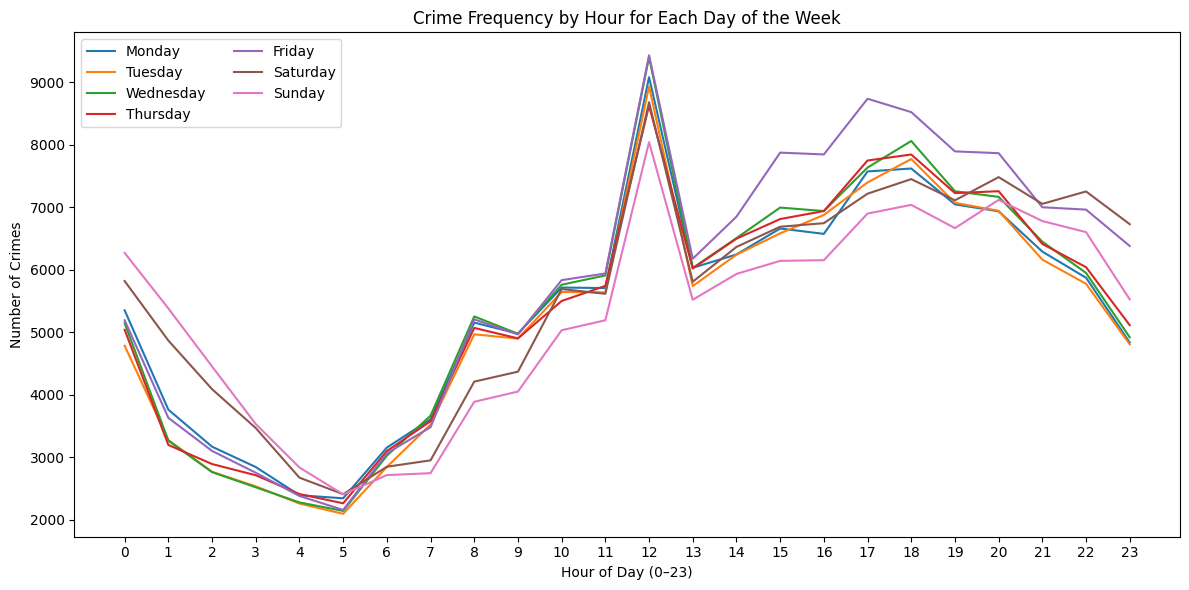

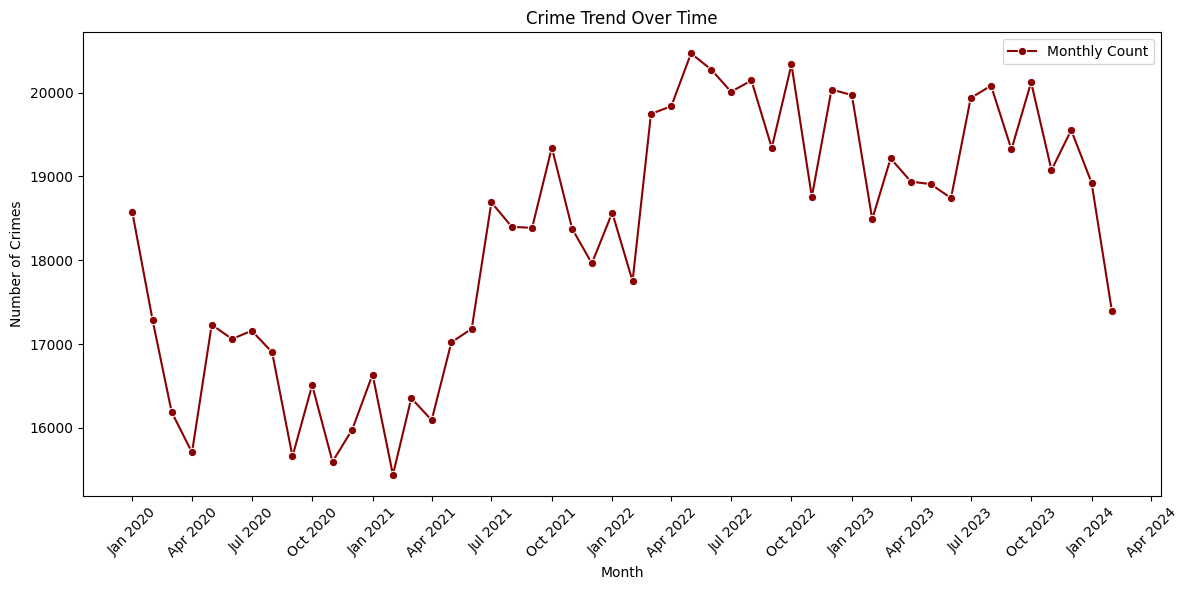

In [66]:
# --- Feature extraction ---
crime_lapd = crime_lapd.assign(
    day_of_week=crime_lapd["date_occ"].dt.day_name(),
    month_name=crime_lapd["date_occ"].dt.month_name(),
    hour=crime_lapd["date_occ"].dt.hour,
    year_month=crime_lapd["date_occ"].dt.to_period("M")
)

DAY_ORDER = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

MONTH_ORDER = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# --- Heatmap: Day vs Month ---
seasonality = (
    crime_lapd
        .pivot_table(
            index="day_of_week",
            columns="month_name",
            values="dr_no",
            aggfunc="count"
        )
        .reindex(index=DAY_ORDER, columns=MONTH_ORDER)
)

plt.figure(figsize=(14, 6))
sns.heatmap(seasonality, cmap="Reds")
plt.title("Crime Frequency by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

# --- Line plot: Hourly patterns by day ---
hour_day = (
    crime_lapd
        .groupby(["day_of_week", "hour"])
        .size()
        .reset_index(name="count")
)

hour_day["day_of_week"] = pd.Categorical(
    hour_day["day_of_week"],
    categories=DAY_ORDER,
    ordered=True
)

plt.figure(figsize=(12, 6))

for day in DAY_ORDER:
    data = hour_day[hour_day["day_of_week"] == day]
    plt.plot(data["hour"], data["count"], label=day)

plt.title("Crime Frequency by Hour for Each Day of the Week")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Crimes")
plt.xticks(range(24))
plt.legend(ncol=2)
plt.tight_layout()
plt.show()



crime_trend = crime_lapd.groupby('year_month').size().reset_index(name='count')
crime_trend['year_month'] = crime_trend['year_month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=crime_trend,
    x="year_month",
    y="count",
    marker="o",
    label="Monthly Count",
    color="darkred"
)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.title("Crime Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


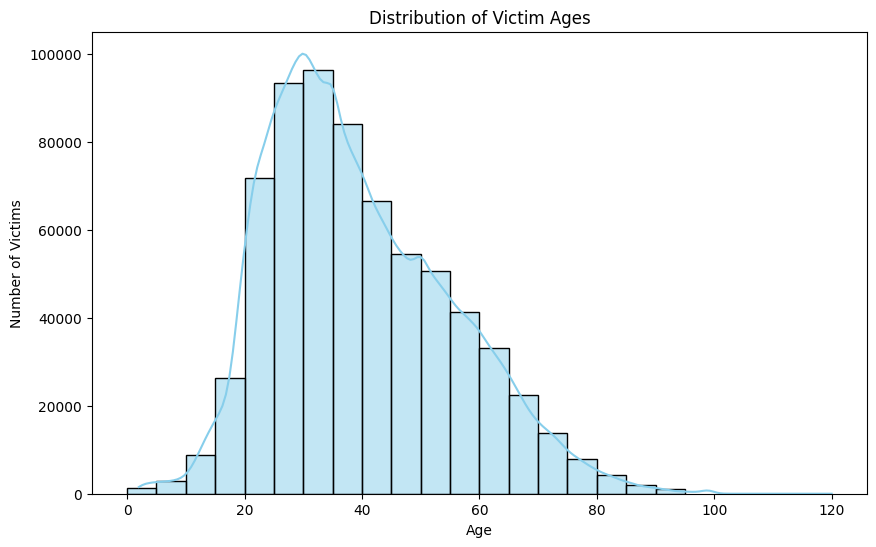

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(crime_lapd['vict_age'].dropna(), bins=range(0, 100, 5), kde=True, color='skyblue')
plt.title("Distribution of Victim Ages")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.show()


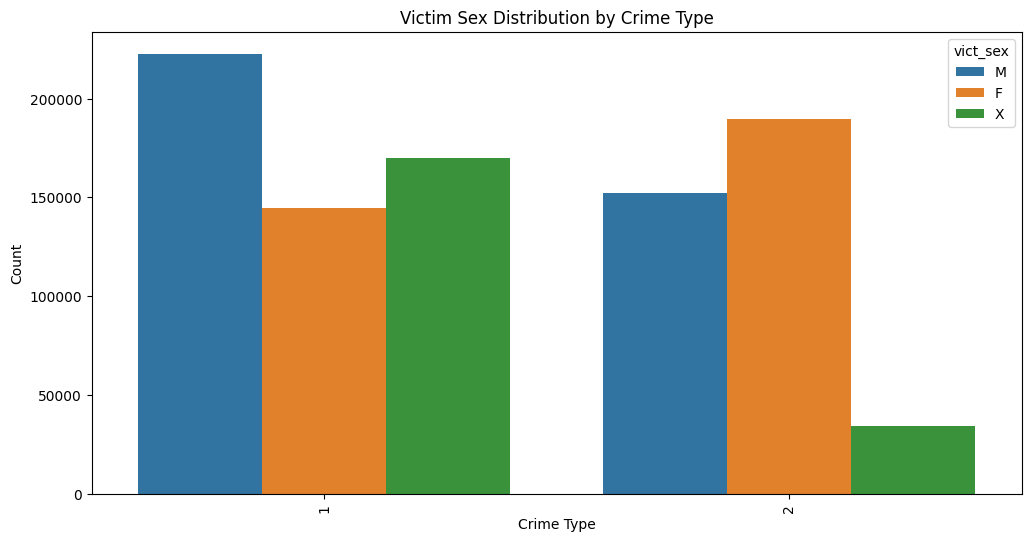

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(data=crime_lapd, x='part_1-2', hue='vict_sex')
plt.xticks(rotation=90)
plt.title("Victim Sex Distribution by Crime Type")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.show()

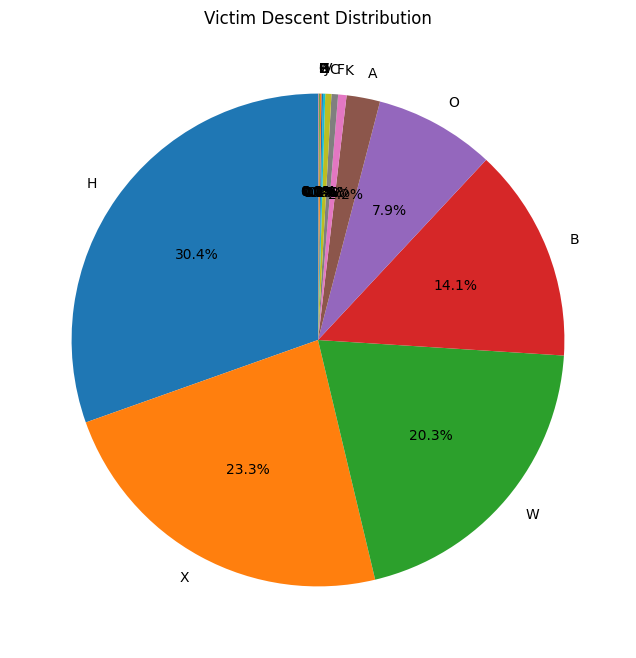

In [71]:
vict_descent_counts = crime_lapd['vict_descent'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(vict_descent_counts, labels=vict_descent_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Victim Descent Distribution")
plt.show()

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_14620\1044755057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_premises.values, y=top_premises.index, palette='magma')


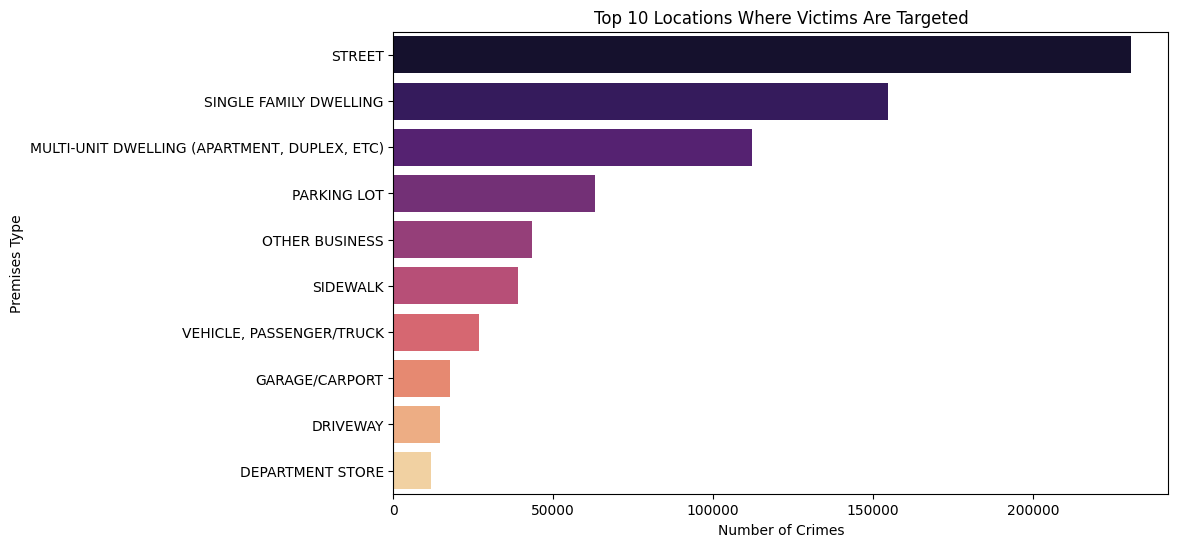

In [74]:
top_premises = crime_lapd['premis_desc'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_premises.values, y=top_premises.index, palette='magma')
plt.title("Top 10 Locations Where Victims Are Targeted")
plt.xlabel("Number of Crimes")
plt.ylabel("Premises Type")
plt.show()
